# Results Analysis II: 

In this notebook we will calculate distributions for some of the outputs of our methods. Particularly, we want to explore the distributions of effective latitudes. 

In [1]:
import sys
sys.path.append('/home/ivanhigueram/reanalysis_getter/')

In [2]:
import os
import dask
import joypy
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pathlib import Path
from src.plotting import eff_lat_dists

# To use dask across the cluster
from dask_jobqueue import SLURMCluster
from dask.distributed import Client

import matplotlib
matplotlib.rcParams.update({'font.size': 15})

In [3]:
places = {
    'greenland': (71.75,360-42.5), 
    'chicago': (42,360-87.5),
    'hohhot': (41,111.75),
    'barent': (75,40.5),
    'pacific': (41.5,179.5)
}

### Load computing cluster (local client)

In [4]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:43272")
client

Client Scheduler: tcp://127.0.0.1:43272 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 7 Cores: 28 Memory: 60.13 GB


### Effective latitudes for ERA-5 data

In [21]:
minn_eff_lat = eff_lat_dists(model_array_path='/project2/geos39650/jet_stream/data/processed_winters/ScenarioMIP_NCAR_CESM2-WACCM_ssp585_day.nc4',
                                eff_latitudes_df_path='/project2/geos39650/jet_stream/data/model_output/eff_lat/eff_lat_gcm_2015_2100.csv',
                                cut_interval=2,
                                latitude=44.9778,
                                longitude=360-93.26
                               )

/home/ivanhigueram/reanalysis_getter/src/plotting.py:37: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetime_index = model_array.indexes['time'].to_datetimeindex()
/scratch/midway2/ivanhigueram/reanalysis_env/lib/python3.7/site-packages/dask/dataframe/core.py:3095: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('temp_bracket', 'category'))

  warnings.warn(meta_warning(meta))


In [16]:
chicago_eff_lat_r = eff_lat_dists(model_array_path='/project2/geos39650/jet_stream/data/processed_winters/df_lat_20_1D.nc',
                                eff_latitudes_df_path='/project2/geos39650/jet_stream/data/model_output/eff_lat/eff_lat_reanalysis_1980_2018.csv',
                                cut_interval=2,
                                latitude=42,
                                longitude=360-60)

/scratch/midway2/ivanhigueram/reanalysis_env/lib/python3.7/site-packages/dask/dataframe/core.py:3095: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('temp_bracket', 'category'))

  warnings.warn(meta_warning(meta))


In [11]:
chicago_eff_lat

,member_id,nbnd,time,time_bnds,lon_bnds,lat_bnds,latitude,longitude,t2m,temp_bracket,area_grid,cdf_eff_lat_mapping,eff_lat_deg
0,r1i1p1f1,0,2015-01-01,2015-01-01 00:00:00,299.375,41.465969,41.937173,300.0,289.287994,288.987,1.366394e+08,0.482091,27.621763
1,r1i1p1f1,0,2015-01-02,2015-01-01 00:00:00,299.375,41.465969,41.937173,300.0,287.505829,286.987,1.267393e+08,0.526482,30.165204
2,r1i1p1f1,0,2015-01-03,2015-01-02 00:00:00,299.375,41.465969,41.937173,300.0,283.058136,282.987,1.102453e+08,0.603152,34.558045
3,r1i1p1f1,0,2015-01-04,2015-01-03 00:00:00,299.375,41.465969,41.937173,300.0,284.595734,282.987,1.099865e+08,0.604386,34.628751
4,r1i1p1f1,0,2015-01-05,2015-01-04 00:00:00,299.375,41.465969,41.937173,300.0,283.934326,282.987,1.098105e+08,0.605226,34.676869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7736,r1i1p1f1,1,2100-12-28,2100-12-28 00:00:00,300.625,42.408379,41.937173,300.0,294.374878,292.987,1.322497e+08,0.501640,28.741853
7737,r1i1p1f1,1,2100-12-29,2100-12-29 00:00:00,300.625,42.408379,41.937173,300.0,295.375397,294.987,1.416204e+08,0.460147,26.364505
7738,r1i1p1f1,1,2100-12-30,2100-12-30 00:00:00,300.625,42.408379,41.937173,300.0,291.265900,290.987,1.214629e+08,0.550609,31.547600
7739,r1i1p1f1,1,2100-12-31,2100-12-31 00:00:00,300.625,42.408379,41.937173,300.0,287.989258,286.987,1.039336e+08,0.633559,36.300254


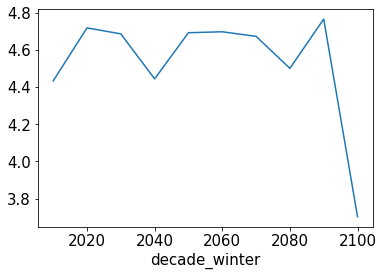

In [45]:
chicago_eff_lat['year_winter'] = group_into_winters(chicago_eff_lat['time'])
chicago_eff_lat['decade_winter'] = chicago_eff_lat.year_winter.apply(lambda x: int(x)//10 * 10)
chicago_eff_lat.groupby('decade_winter').eff_lat_deg.std().plot()

In [36]:
chicago_eff_lat.to_csv('/project2/geos39650/jet_stream/data/model_output/eff_lat/eff_lat_gcm_chicago.csv', index=False)

In [12]:
def group_into_winters(dates): #untested
    year_arr = np.zeros(len(dates),dtype=int)
    y=0
    for date in dates:
        if date.month < 3:
            year_arr[y] = date.year - 1
        else:
            year_arr[y] = date.year
        y+=1
    return year_arr


def joy_div(data,
            time_key='year',
            time_var='time',
            data_key='t_prime',
            decade=False):
    ''' accepts a dataframe and make a joy division plot of successive distributions in data_key. 
     If decade=False, these distributions are calculated yearly. If True, they are calculated every 10 years'''
            
    data['year'] = group_into_winters(data[time_var])
    time_key='year'
    if decade:
        time_key='decade'
        data['decade'] = data.year.apply(lambda x: int(x)//10 * 10)
    data_filter = data.filter([time_key, data_key])
    
    labels=[y if y%5==0 else None for y in list(data[time_key].unique())]
    fig, axes = joypy.joyplot(data_filter, 
                          by=time_key,
                              labels=labels,
                              grid='y',
                              linewidth=1,
                          column=data_key,
                          fade=True,
                          figsize=(10, 10))
    plt.xlabel("Effective Latitude [degrees]")
    plt.ylabel("year")
    plt.show()
    plt.savefig('/home/ivanhigueram/public_html/joy_plt_prj.png')
    return data_filter


def overlayed_decades(data,
                      year,
                      ax,
                      var='t_prime',
                      clr='blue'):
    data_in_decade = data.loc[(data['decade']==year),var]
    
    sns.kdeplot(data_in_decade, 
                ax=ax,
                shade=True, 
                alpha=0.3, 
                Label=str(year)+'s',
                color=clr)
    
    quantiles = np.quantile(data_in_decade,[0.1,0.9])
    
    plt.axvline(quantiles[0],color=clr,linestyle='--',alpha=0.5)
    plt.axvline(quantiles[1],color=clr,linestyle='--',alpha=0.5)

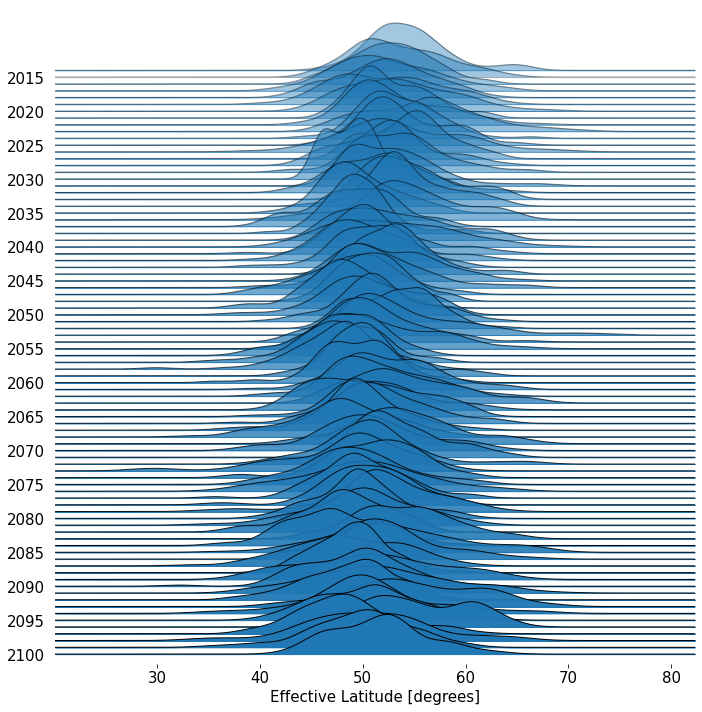

,year,eff_lat_deg
0,2014,55.523931
1,2014,55.893518
2,2014,55.534004
3,2014,52.006155
4,2014,54.214894
...,...,...
7736,2100,57.900199
7737,2100,62.273827
7738,2100,52.698523
7739,2100,52.736724


<Figure size 432x288 with 0 Axes>

In [23]:
joy_div(minn_eff_lat,
        time_key='year',
        data_key='eff_lat_deg',
        decade=False)

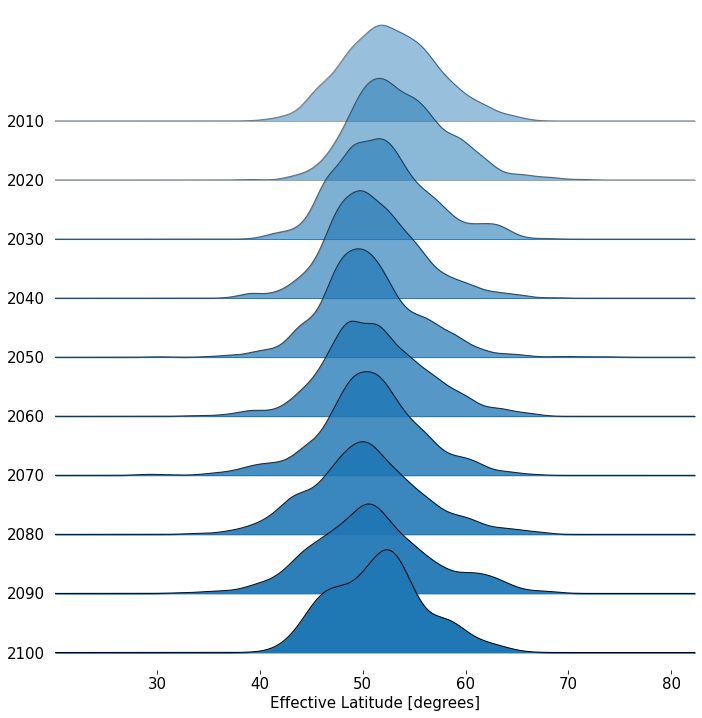

,decade,eff_lat_deg
0,2010,55.523931
1,2010,55.893518
2,2010,55.534004
3,2010,52.006155
4,2010,54.214894
...,...,...
7736,2100,57.900199
7737,2100,62.273827
7738,2100,52.698523
7739,2100,52.736724


<Figure size 432x288 with 0 Axes>

In [24]:
joy_div(minn_eff_lat,
        time_key='year',
        data_key='eff_lat_deg',
        decade=True)

Text(0, 0.5, 'Density')

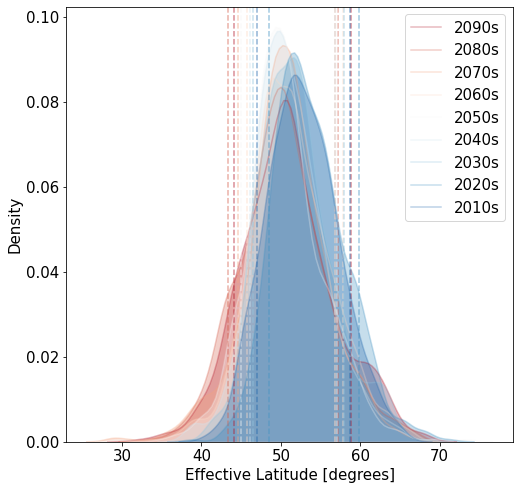

In [25]:
colors = ['#b2182b',
          '#d6604d',
          '#f4a582',
          '#fddbc7',
          '#f7f7f7',
          '#d1e5f0',
          '#92c5de',
          '#4393c3',
          '#2166ac']
years = [2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]

years.reverse()

fig, ax = plt.subplots(figsize=(8, 8))
for year, color in zip(years, colors):
    overlayed_decades(minn_eff_lat, 
                      year,
                      clr=color, 
                      ax=ax,
                      var='eff_lat_deg')
plt.xlabel("Effective Latitude [degrees]")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

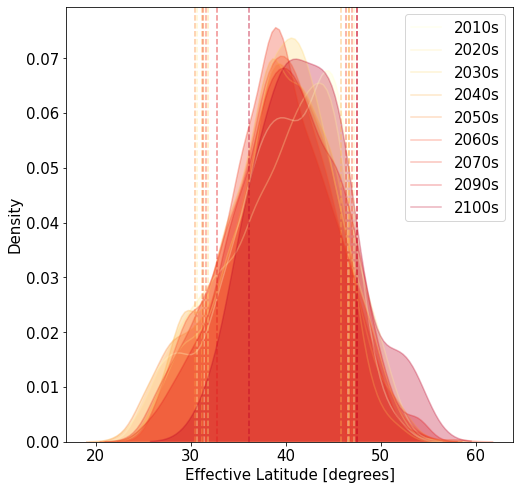

In [55]:
fig, ax = plt.subplots(figsize=(8, 8))
overlayed_decades(chicago_eff_lat,2010,clr='#ffffcc', ax=ax, var='eff_lat_deg')
overlayed_decades(chicago_eff_lat,2020,clr='#ffeda0', ax=ax, var='eff_lat_deg')
overlayed_decades(chicago_eff_lat,2030,clr='#fed976', ax=ax, var='eff_lat_deg')
overlayed_decades(chicago_eff_lat,2040,clr='#feb24c', ax=ax, var='eff_lat_deg')
overlayed_decades(chicago_eff_lat,2050,clr='#fd8d3c', ax=ax, var='eff_lat_deg')
overlayed_decades(chicago_eff_lat,2060,clr='#fc4e2a', ax=ax, var='eff_lat_deg')
overlayed_decades(chicago_eff_lat,2070,clr='#f03b20', ax=ax, var='eff_lat_deg')
overlayed_decades(chicago_eff_lat,2090,clr='#e31a1c', ax=ax, var='eff_lat_deg')
overlayed_decades(chicago_eff_lat,2100,clr='#bd0026', ax=ax, var='eff_lat_deg')
plt.xlabel("Effective Latitude [degrees]")
plt.ylabel("Density")

In [63]:
# Load reanalysis data and convert it to a Dask dataframe
t2m_era5 = xr.open_dataset('/project2/geos39650/jet_stream/data/model_output/demean/demean_t_prime_1980_2020.nc4',
                          chunks={'time': 1})
t2m_era5

In [67]:
np.std(t2m_era5.__xarray_dataarray_variable__.values)

5.151012006536834

In [71]:
t2m_cimp = xr.open_dataset('/project2/geos39650/jet_stream/data/model_output/demean/demean_t_prime_cimp6_1980_2100.nc4',
                          chunks={'time': 1})
res = t2m_cimp.resample(time='10Y').std().compute()

In [72]:
res

<xarray.Dataset>
Dimensions:    (latitude: 75, longitude: 288, time: 9)
Coordinates:
  * time       (time) datetime64[ns] 2015-12-31 2025-12-31 ... 2095-12-31
  * latitude   (latitude) float64 20.26 21.2 22.15 23.09 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    t_prime    (time, latitude, longitude) float64 2.044 2.076 ... 3.878 3.878